In [22]:
import numpy as np
from scipy import sparse 
import matplotlib.pyplot as plt
import networkx as nx
import random
import pandas as pd
from datetime import date, timedelta
import time
random.seed(42)

In [2]:
edges = np.load("edges.npz", allow_pickle=True)["arr_0"]

In [4]:
edges, len(edges)

(array([[31851, 55851, 15006],
        [63117, 20620, 14245],
        [62807, 20620, 14245],
        ...,
        [60983, 58761, 18810],
        [60983, 58740, 18810],
        [60983, 58750, 18810]]),
 2276703)

In [5]:
degree_count = {}

for v1, v2, _ in edges:
    degree_count[v1] = degree_count.get(v1, 0) + 1
    degree_count[v2] = degree_count.get(v2, 0) + 1

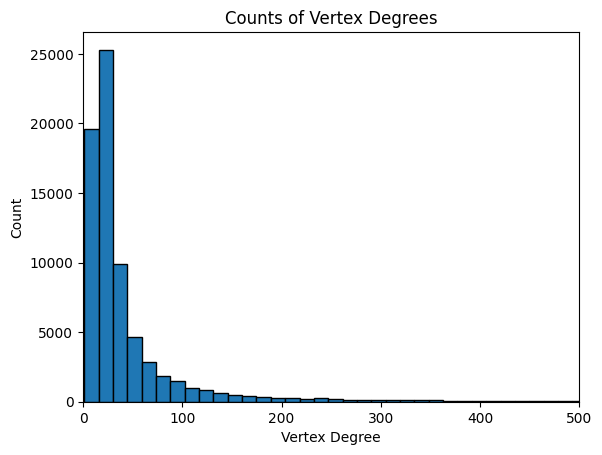

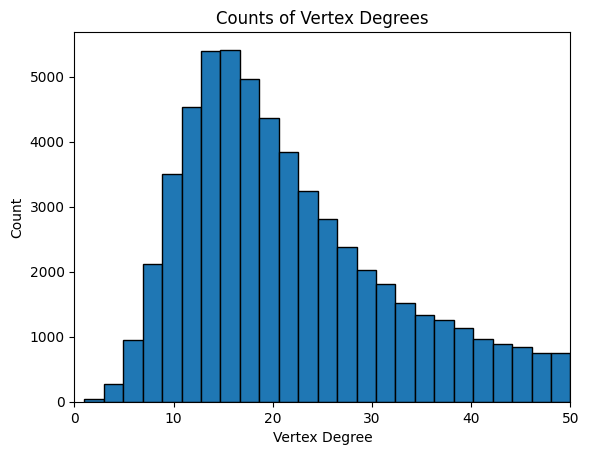

In [18]:

data = degree_count.values()
n_bins = int(np.floor(np.sqrt(len(data))))
plt.hist(data, bins=n_bins*10, edgecolor='black')

#plt.yscale('log')
plt.title('Counts of Vertex Degrees')
plt.xlabel('Vertex Degree')
plt.ylabel('Count')
plt.xlim(0, 500)
plt.show()

X_LIM = 50
data = [d for d in data if d <= 50]
n_bins = int(np.floor(np.sqrt(len(data))))
plt.hist(data, bins=25, edgecolor='black')
#plt.yscale('log')
plt.title('Counts of Vertex Degrees')
plt.xlabel('Vertex Degree')
plt.ylabel('Count')
plt.xlim(0, 50)
plt.show()

In [27]:
origin = date(1970, 1, 1)
years = [(origin + timedelta(days=int(days))).year for _, _, days in edges]

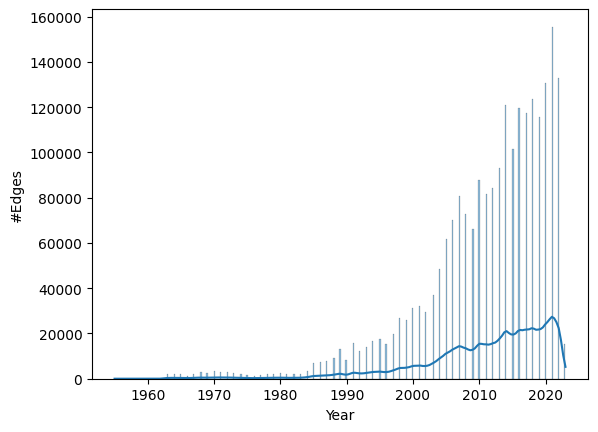

In [33]:
import seaborn as sns
sns.histplot(years, kde=True)
plt.xlabel('Year')
plt.ylabel('#Edges')

# Display the plot
plt.show()

In [39]:
def find(target, d):
    for key, value in d.items():
        if value == target:
            return key
        
sorted(degree_count.values(), reverse=True)

[42338,
 23826,
 19664,
 17796,
 16720,
 15367,
 14806,
 14613,
 12806,
 12574,
 11399,
 10610,
 9928,
 9879,
 9457,
 9374,
 9126,
 8655,
 8216,
 8192,
 7745,
 7630,
 7310,
 7262,
 6466,
 6394,
 6359,
 6300,
 6244,
 6165,
 6091,
 6084,
 6018,
 5791,
 5706,
 5617,
 5419,
 5366,
 5309,
 5304,
 4974,
 4846,
 4703,
 4688,
 4680,
 4634,
 4568,
 4515,
 4446,
 4369,
 4360,
 4338,
 4299,
 4145,
 4099,
 3943,
 3874,
 3796,
 3757,
 3722,
 3719,
 3645,
 3637,
 3621,
 3586,
 3566,
 3557,
 3511,
 3450,
 3344,
 3341,
 3307,
 3264,
 3247,
 3109,
 3055,
 3030,
 3025,
 3020,
 3011,
 2939,
 2900,
 2847,
 2845,
 2797,
 2785,
 2784,
 2779,
 2767,
 2761,
 2750,
 2685,
 2665,
 2664,
 2603,
 2593,
 2590,
 2582,
 2570,
 2553,
 2521,
 2504,
 2494,
 2470,
 2463,
 2442,
 2438,
 2424,
 2413,
 2396,
 2392,
 2383,
 2377,
 2358,
 2353,
 2350,
 2347,
 2331,
 2327,
 2323,
 2297,
 2288,
 2285,
 2284,
 2279,
 2274,
 2221,
 2212,
 2199,
 2194,
 2192,
 2182,
 2159,
 2123,
 2109,
 2102,
 2099,
 2098,
 2083,
 2079,
 2071,
 

In [7]:
find(10610, degree_count)

8

In [8]:
rnd_vertices=random.sample(range(6000),50) # we use 50 random concepts

In [21]:
# here we will find all indices of edges where the concept is either the first or the second vertex
full_idx0 = []
full_idx1 = []
for ii in range(len(rnd_vertices)): 
    full_idx0 = np.concatenate((full_idx0, np.where(edges[:,0] == rnd_vertices[ii])[0]))
    full_idx1 = np.concatenate((full_idx1, np.where(edges[:,1] == rnd_vertices[ii])[0]))

all_idx = list(set(full_idx0) & set(full_idx1))

subgraph = edges[np.array(all_idx).astype(int)]

# Important vertices, they have at least one edge in subgraph
imp_vertices = list(set(list(subgraph[:,0]) + list(subgraph[:,1])))
print("# Connected Vertices in subgraph:", len(imp_vertices))
print("# Edges in subgraph:", len(subgraph))

# Rename vertices [0,6000] => [0, 49]
for ii in range(len(rnd_vertices)):
    subgraph[:,0]=[ii if x==rnd_vertices[ii] else x for x in subgraph[:,0]]
    subgraph[:,1]=[ii if x==rnd_vertices[ii] else x for x in subgraph[:,1]]


# Connected Vertices in subgraph: 37
# Edges in subgraph: 52


In [25]:
# Create Subgraph at different times
day_origin = pd.to_datetime("1970-01-01")
years = [2010, 2012, 2014]
all_nx_nets = []

def get_until(graph, day):
    return graph[graph[:,2] < (day-day_origin).days]

for yy in years:
    print('Create Graph for ', yy)

    day_curr = pd.Timestamp(yy, 12, 31)
    all_edges_curr = get_until(subgraph, day_curr)
    adj_mat_sparse_curr = sparse.csr_matrix(
        (np.ones(len(all_edges_curr)), 
        (all_edges_curr[:,0], all_edges_curr[:,1])), 
        shape=(len(rnd_vertices),len(rnd_vertices))
    )
    print('Number of edges: ',adj_mat_sparse_curr.getnnz())
    G_curr=nx.from_scipy_sparse_array(adj_mat_sparse_curr, parallel_edges=False, create_using=None, edge_attribute='weight')
    
    all_nx_nets.append(G_curr)



Create Graph for  2010
Number of edges:  17
Create Graph for  2012
Number of edges:  23
Create Graph for  2014
Number of edges:  28


Network of the year  2010


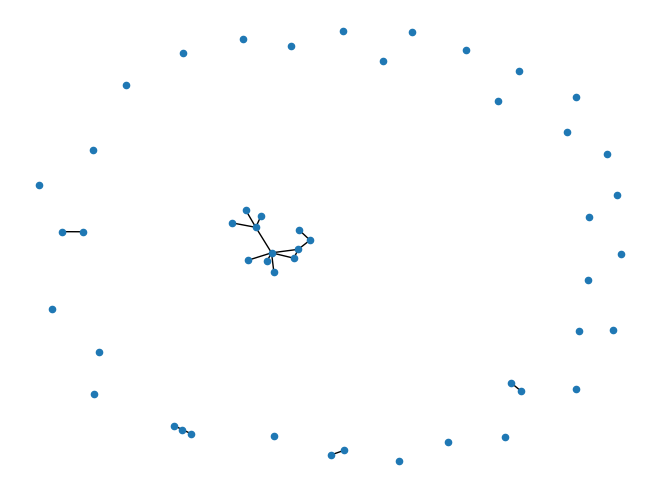

Network of the year  2012


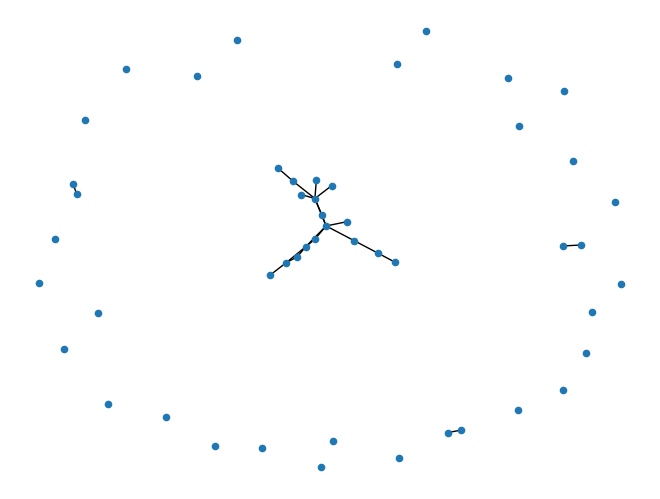

Network of the year  2014


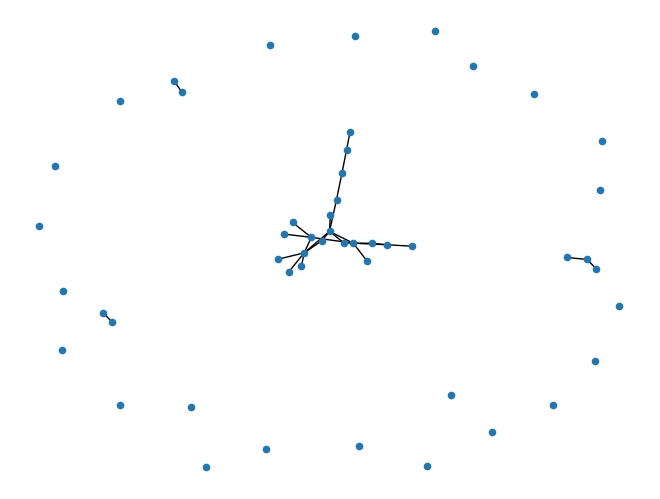

In [26]:
# Plotting

import matplotlib.pyplot as plt

for idx in range(len(all_nx_nets)):
    print('Network of the year ',years[idx])
    curr_net = all_nx_nets[idx]
    nx.draw(curr_net, pos=nx.spring_layout(curr_net), node_size=20)
    plt.show()

In [105]:
NUM_VERTICES = 125_019

A = sparse.csr_matrix(
        (
            np.ones(len(edges) * 2), 
            (
                np.concatenate((edges[:,0],edges[:,1])),                
                np.concatenate((edges[:,1],edges[:,0]))
            )
        ), 
        shape=(NUM_VERTICES, NUM_VERTICES)
)

G = nx.from_scipy_sparse_array(
    A, 
    parallel_edges=False, # cannot be multi-graph if constructed from adjacency matrix 
    edge_attribute='days'
)

G

In [97]:
len(G.edges()),len(edges)

(2438587, 2779100, array([  815,    31,    31, ..., 45880, 11148,   773]))

In [61]:
(edges[:,0], edges[:,1])

(array([ 815,   31,   31, ..., 5510, 5510, 5510]),
 array([68884, 68884,   815, ..., 45880, 11148,   773]))

In [123]:
def is_symmetric(matrix, tol=1e-9) -> bool:
    """
    Check if a given sparse matrix is symmetric within a specified tolerance.

    Args:
        matrix (csr_matrix): The input sparse matrix.
        tol (float, optional): The numerical tolerance for comparison. Defaults to 1e-9.

    Returns:
        bool: True if the matrix is symmetric, False otherwise.
    """
    if matrix.shape[0] != matrix.shape[1]:
        return False  # The matrix is not square.

    # Calculate the difference between the matrix and its transpose.
    diff = (matrix - matrix.transpose()).data

    # Check if the maximum absolute difference is within the tolerance.
    return np.max(np.abs(diff)) <= tol

27216

In [190]:

def get_draw_sample(n):

    bag = range(n)
    drawn = set()

    def draw_sample():
        while (comb := frozenset(random.sample(bag, 2))) in drawn:
            pass    
        
        drawn.add(comb)
        return comb
        
    return draw_sample

In [244]:
f = get_draw_sample(10)

In [295]:
DAY_ORIGIN = date(1970, 1, 1)
NUM_OF_VERTICES = 125_019


def get_until(graph, day):
    return graph[graph[:, 2] < (day - DAY_ORIGIN).days]


def build_adj_matrix(edge_list):
    """Build a symmetric adjacency matrix from edge list."""
    EDGE_WEIGHT = np.ones(len(edge_list) * 2)  # each connection weights the same

    row_ind = np.concatenate((edge_list[:, 0], edge_list[:, 1]))
    col_ind = np.concatenate((edge_list[:, 1], edge_list[:, 0]))

    return sparse.csr_matrix(
        (
            EDGE_WEIGHT,
            (row_ind, col_ind),
        ),
        shape=(NUM_OF_VERTICES, NUM_OF_VERTICES),
    )


def build_graphs(full_graph, until_year):
    print("Create Graph for: ", until_year)
    day_curr = date(until_year, 12, 31)

    edges_curr = get_until(full_graph, day_curr)
    adj_mat_sparse_curr = build_adj_matrix(edges_curr)

    graph_curr = nx.from_scipy_sparse_array(
        adj_mat_sparse_curr,
        parallel_edges=False,
        edge_attribute="weight",  # weight corresponds with number of edges between nodes
    )

    print("Done: Create Graph for ", until_year)
    print("Num of edges: ", graph_curr.number_of_edges())

    return graph_curr, edges_curr, adj_mat_sparse_curr


def get_draw_sample(n):
    bag = range(n)
    drawn = set()

    def draw_sample():
        while (comb := frozenset(random.sample(bag, 2))) in drawn:
            pass

        drawn.add(comb)
        return comb

    return draw_sample


def create_training_data(
    full_graph, year_start, years_delta, edges_used=500_000, vertex_degree_cutoff=10
):
    """
    :param full_graph: Full graph, numpy array dim(n,3) [vertex 1, vertex 2, time stamp]
    :param year_start: year of graph
    :param years_delta: distance for prediction in years (prediction on graph of year_start+years_delta)
    :param edges_used: optional filter to create a random subset of edges for rapid prototyping (default: 500,000)
    :param vertex_degree_cutoff: optional filter, for vertices in training set
                                 having a minimal degree of at least vertex_degree_cutoff  (default: 10)

    :return:
    all_edge_list: graph of year_start, numpy array dim(n,2)
    unconnected_vertex_pairs: potential edges for year_start+years_delta
    unconnected_vertex_pairs_solution: numpy array with integers
        (0=unconnected, 1=connected), solution, length = len(unconnected_vertex_pairs)
    """

    year_end = year_start + years_delta

    train_graph, train_edge_list, train_sparse_mat = build_graphs(
        full_graph, until_year=year_start
    )

    test_graph, _, _ = build_graphs(full_graph, until_year=year_end)

    # The .sum(0) function calculates the sum of each column in the matrix,
    # which is equivalent to finding the degree of each vertex in the graph,
    # assuming that the graph is undirected.
    all_degs = np.array(train_sparse_mat.sum(0))[0]

    # Use only vertices with degrees larger than cutoff (10).
    vertices = np.array(range(NUM_OF_VERTICES))
    vertices = vertices[all_degs >= vertex_degree_cutoff]

    ## Create all edges to be predicted
    unconnected_vertex_pairs = []
    unconnected_vertex_pairs_solution = []

    time_start = time.time()

    draw_sample = get_draw_sample(len(vertices))
    while len(unconnected_vertex_pairs) < edges_used:
        i1, i2 = draw_sample()
        v1, v2 = vertices[i1], vertices[i2]

        # graph is undirected: == has_edge(v2,v1)
        if v1 != v2 and not train_graph.has_edge(v1, v2):
            if len(unconnected_vertex_pairs) % 10**6 == 0:
                time_end = time.time()
                print(
                    "    edge progress (",
                    time_end - time_start,
                    "sec): ",
                    len(unconnected_vertex_pairs) / 10**6,
                    "M/",
                    edges_used / 10**6,
                    "M",
                )
                time_start = time.time()

            unconnected_vertex_pairs.append((v1, v2))
            unconnected_vertex_pairs_solution.append(test_graph.has_edge(v1, v2))

    print(
        "Number of unconnected vertex pairs for prediction: ",
        len(unconnected_vertex_pairs_solution),
    )
    print(
        "Number of vertex pairs that will be connected: ",
        sum(unconnected_vertex_pairs_solution),
    )
    print(
        "Ratio of vertex pairs that will be connected: ",
        sum(unconnected_vertex_pairs_solution) / len(unconnected_vertex_pairs_solution),
    )

    unconnected_vertex_pairs = np.array(unconnected_vertex_pairs)
    unconnected_vertex_pairs_solution = np.array(
        list(map(int, unconnected_vertex_pairs_solution))
    )
    all_edge_list = np.array(train_edge_list)

    return all_edge_list, unconnected_vertex_pairs, unconnected_vertex_pairs_solution

In [299]:
graph_e_list, train_edges_to_check, train_edges_solution = create_training_data(edges, 2011, 3, edges_used=2_000_000)

Create Graph for:  2011
Done: Create Graph for  2011
Num of edges:  1057519
Create Graph for:  2014
Done: Create Graph for  2014
Num of edges:  1367653
    edge progress ( 0.0008559226989746094 sec):  0.0 M/ 2.0 M
    edge progress ( 26.398649215698242 sec):  1.0 M/ 2.0 M
Number of unconnected vertex pairs for prediction:  2000000
Number of vertex pairs that will be connected:  245
Ratio of vertex pairs that will be connected:  0.0001225
